In [2]:
import drjit as dr
import mitsuba as mi

mi.set_variant('cuda_ad_rgb')

scene = mi.load_file('scenes/editing-a-scene/simple.xml')

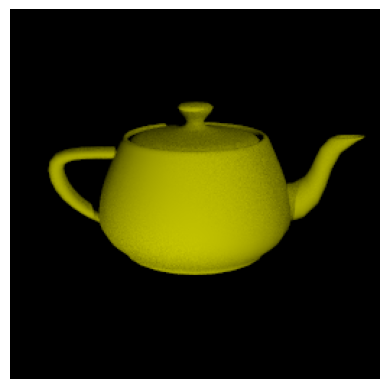

In [3]:
original_image = mi.render(scene, spp=128)

import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(original_image ** (1.0 / 2.2))

In [4]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  ------------------------------------------------------------------------------------
  Name                             Flags    Type            Parent
  ------------------------------------------------------------------------------------
  sensor.near_clip                          float           PerspectiveCamera
  sensor.far_clip                           float           PerspectiveCamera
  sensor.shutter_open                       float           PerspectiveCamera
  sensor.shutter_open_time                  float           PerspectiveCamera
  sensor.film.size                          ScalarVector2u  HDRFilm
  sensor.film.crop_size                     ScalarVector2u  HDRFilm
  sensor.film.crop_offset                   ScalarPoint2u   HDRFilm
  sensor.x_fov                              Float           PerspectiveCamera
  sensor.to_world                           Transform4f     PerspectiveCamera
  teapot.bsdf.reflectance.value    ∂        Color3f         SRGBReflec

In [8]:
print('sensor.near_clip: ', params['sensor.near_clip'])
print('teapot.bsdf.reflectance.value:',  params['teapot.bsdf.reflectance.value'])
print('light1.intensity.value:       ',  params['light1.intensity.value'])

sensor.near_clip:  0.009999999776482582
teapot.bsdf.reflectance.value: [[0.8999999761581421, 0.8999999761581421, 0.0]]
light1.intensity.value:        [[100.0, 100.0, 100.0]]


In [9]:
params['light1.intensity.value'] *= [1.5, 0.2, 0.2]
params['light2.intensity.value'] *= [0.2, 1.5, 0.2]

params.update()

[(SRGBReflectanceSpectrum[
    value = [[20, 150, 20]]
  ],
  {'value'}),
 (SRGBReflectanceSpectrum[
    value = [[150, 20, 20]]
  ],
  {'value'}),
 (PointLight[
    position = [-3, -10, -2],
    intensity = SRGBReflectanceSpectrum[
    value = [[20, 150, 20]]
  ],
    medium = none],
  {'intensity'}),
 (PointLight[
    position = [3, -10, 6],
    intensity = SRGBReflectanceSpectrum[
    value = [[150, 20, 20]]
  ],
    medium = none],
  {'intensity'}),
 (Scene[
    children = [
      DirectIntegrator[
        emitter_samples = 1,
        bsdf_samples = 1
      ],
      PerspectiveCamera[
        x_fov = [34.0221],
        near_clip = 0.01,
        far_clip = 10000,
        film = HDRFilm[
          size = [256, 256],
          crop_size = [256, 256],
          crop_offset = [0, 0],
          sample_border = 0,
          filter = BoxFilter[],
          file_format = OpenEXR,
          pixel_format = rgb,
          component_format = float16,
        ],
        sampler = IndependentSamp

In [10]:
# translate the teapot
V = dr.unravel(mi.Point3f, params['teapot.vertex_positions'])
V.z += 0.5
params['teapot.vertex_positions'] = dr.ravel(V)

params.update()

[(PLYMesh[
    name = "teapot.ply",
    bbox = BoundingBox3f[
      min = [-3, -2, 0.5],
      max = [3.42963, 2, 3.65]
    ],
    vertex_count = 1177,
    vertices = [27.6 KiB of vertex data],
    face_count = 2256,
    faces = [26.4 KiB of face data],
    face_normals = 0
  ],
  {'vertex_positions'}),
 (Scene[
    children = [
      DirectIntegrator[
        emitter_samples = 1,
        bsdf_samples = 1
      ],
      PerspectiveCamera[
        x_fov = [34.0221],
        near_clip = 0.01,
        far_clip = 10000,
        film = HDRFilm[
          size = [256, 256],
          crop_size = [256, 256],
          crop_offset = [0, 0],
          sample_border = 0,
          filter = BoxFilter[],
          file_format = OpenEXR,
          pixel_format = rgb,
          component_format = float16,
        ],
        sampler = IndependentSampler[
          base_seed = 0
          sample_count = 128
          samples_per_wavefront = 128
          wavefront_size = 8388608
        ],
        res

Text(0.5, 1.0, 'modified')

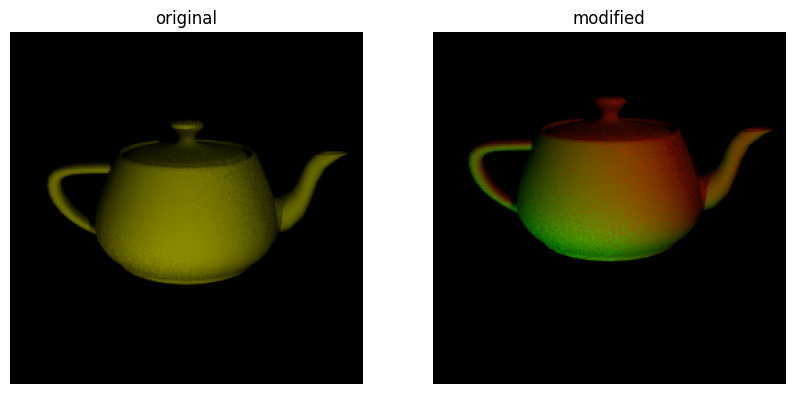

In [13]:
modified_image = mi.render(scene, spp=128)
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1).imshow(original_image); plt.axis('off'); plt.title('original')
fig.add_subplot(1, 2, 2).imshow(modified_image); plt.axis('off'); plt.title('modified')